# AeroFit Treadmill Data Analysis

## Table of Contents

* [Business Problem Statement](#business-problem-statement)
* [Task](#task)
* [Description of Data](#description-of-data)
* [Exploring and handling data](#exploring-and-handling-data)
* [A Summary Using Statistics](#a-summary-using-statistics)
* [Analyzing Data Without Using Graphs](#analyzing-data-without-using-graphs)
* [Analyzing Data Using Graphs](#analyzing-data-using-graphs)
* [Correlation](#correlation)
* [Marginal And Conditional Probabilities](#marginal-and-conditional-probabilities)
* [Outlier Detection](#outlier-detection)
* [Actionable Insights](#actionable-insights)
* [Recommendations](#recommendations)

# Business Problem Statement

AeroFit, a fitness equipment company, faces the challenge of optimizing its marketing strategy by understanding and leveraging the distinctive characteristics of its treadmill products. The current business problem is the lack of a targeted approach in recommending treadmills to new customers. The market research team aims to identify and analyze variations in customer characteristics across AeroFit's product line, specifically focusing on the KP281, KP481, and KP781 treadmills. The objective is to create a detailed customer profile for each product, providing insights into the preferences and demographics of the target audience for effective marketing and product recommendations.


<p align="center">
  <img src="https://simplifaster.com/wp-content/uploads/2018/01/Treadmill.jpg" alt="AeroFit Treadmill">
</p>


# Task 
#### Customer Profile Analysis for AeroFit Treadmill Products

### Objective: 
The market research team at AeroFit aims to identify the characteristics of the target audience for each treadmill product to enhance recommendations to new customers. Descriptive analytics will be performed, including the creation of tables and charts. Additionally, two-way contingency tables will be constructed for each product to compute conditional and marginal probabilities, providing insights into their impact on the business.

#### Product Portfolio:
1. **KP281:**
   - Type: Entry-level treadmill
   - Price: $1,500

2. **KP481:**
   - Type: Mid-level runner's treadmill
   - Price: $1,750

3. **KP781:**
   - Type: Advanced features treadmill
   - Price: $2,500


The analysis will yield a comprehensive customer profile for each AeroFit treadmill product, enabling the market research team to tailor recommendations based on customer characteristics and preferences.

# Description of Data
The data was compiled by the company and focuses on individuals who made purchases of treadmills from AeroFit stores in the preceding three months. The dataset, available in `aerofit_treadmill_data.csv`, encompasses the following features:

- `Product`: The type of treadmill purchased, categorized as KP281, KP481, or KP781.
- `Age`: Age of the customer in years.
- `Gender`: Gender classification as male or female.
- `Education`: Educational background of the customer in years.
- `MaritalStatus`: Marital status of the customer (single or partnered).
- `Usage`: The average number of times the customer plans to use the treadmill each week.
- `Fitness`: Self-rated fitness level on a scale of 1-5, with 1 indicating poor shape and 5 indicating excellent shape.
- `Income`: Annual income of the customer in US dollars.
- `Miles`: The average number of miles the customer expects to walk or run each week.

# Exploring and handling data

This Python script utilizes the pandas library to import treadmill data from a CSV file, handling errors such as file not found, empty file, and parsing issues. The loaded data is then displayed using the head() function.

In [70]:
import pandas as pd
# Importing data with error handling
csv_file_path = "./datasets/aerofit_treadmill_data.csv"
try:
    treadmill_data = pd.read_csv(csv_file_path)
except FileNotFoundError:
    print(f"Error: File '{csv_file_path}' not found.")
except pd.errors.EmptyDataError:
    print(f"Error: File '{csv_file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse CSV file '{csv_file_path}'.")

treadmill_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47



The code retrieves and prints the dimensions of the DataFrame `treadmill_data`, providing the number of rows and columns in the dataset.

In [4]:
# Get the shape of the DataFrame
dataframe_shape = treadmill_data.shape
print(f"Number of rows: {dataframe_shape[0]}, Number of columns: {dataframe_shape[1]}")


Number of rows: 180, Number of columns: 9


This code snippet retrieves and prints the column names of the DataFrame `treadmill_data`, offering insight into the available features or variables in the dataset.

In [5]:
# Get the column names of the DataFrame
dataframe_columns = treadmill_data.columns
print("Column names:", dataframe_columns)


Column names: Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')


In [6]:
# Get the data types of each column in the DataFrame
column_datatypes = treadmill_data.dtypes
print("Data types of each column:\n", column_datatypes)


Data types of each column:
 Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object


**Description:**
The code converts selected columns ('Product', 'Gender', and 'MaritalStatus') in the DataFrame `treadmill_data` to the 'category' data type. It then displays information about the DataFrame, including data types, non-null counts, and memory usage, using the `info()` method.

In [8]:
# Convert specific columns to 'category' type
treadmill_data['Product'] = treadmill_data['Product'].astype('category')
treadmill_data['Gender'] = treadmill_data['Gender'].astype('category')
treadmill_data['MaritalStatus'] = treadmill_data['MaritalStatus'].astype('category')
# Display information about the DataFrame
treadmill_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


The DataFrame contains columns with the "object" data type. As each of these columns only consists of a fixed set of labels, we can change the data type to "category."

**Description:**
This code calculates and prints the skewness of each column in the DataFrame `treadmill_data`, providing insights into the distribution asymmetry of the dataset. Skewness values help assess the departure from a symmetrical distribution: a skewness of 0 indicates a perfectly symmetrical distribution.

In [9]:
# Calculate the skewness of each column in the DataFrame
skewness = treadmill_data.skew()
print("Skewness of each column:\n", skewness)


Skewness of each column:
 Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64


/tmp/ipykernel_14442/3212180379.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = treadmill_data.skew()


# A Summary Using Statistics

In [10]:
# Display descriptive statistics for all columns in the DataFrame
treadmill_data.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


Summary:
1. No missing values in the data.
2. There are 3 different products in the dataset, with KP281 being the most common.
3. The age range is from 18 to 50, with an average age of 28.79. 75% of individuals are aged 33 or younger.
4. Most people (75%) have 16 years of education or less.
5. Out of 180 data points, 104 individuals are male, and the remaining are female.
6. Income and Miles variables have high standard deviations, indicating potential outliers in these values.

**Description:**
The code checks for missing values in the DataFrame `treadmill_data` and prints the count of missing values for each column. This information is valuable for data quality assessment and potential imputation strategies.

In [11]:
# Check for missing values in the DataFrame
missing_values = treadmill_data.isna().sum()
# Display the count of missing values for each column
print("Missing values count for each column:\n", missing_values)

Missing values count for each column:
 Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


**Description:**
This code checks for duplicate values in the DataFrame `treadmill_data` and prints the count of such duplicates. Identifying and handling duplicate records is essential for maintaining data integrity and analysis accuracy.

In [12]:
# Check for duplicate values in the DataFrame
duplicate_count = treadmill_data.duplicated(subset=None, keep='first').sum()

# Display the count of duplicate values
print("Number of duplicate values in the dataset:", duplicate_count)


Number of duplicate values in the dataset: 0


# Analyzing Data Without Using Graphs

**Description:**
The code counts the occurrences of each unique value in the 'Product' column of the DataFrame `treadmill_data` and prints the result. This information provides a distribution of different product types in the dataset.

In [13]:
# Count the occurrences of each unique value in the 'Product' column
product_counts = treadmill_data["Product"].value_counts()

# Display the value counts
print("Value counts for 'Product' column:\n", product_counts)


Value counts for 'Product' column:
 KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64


**Description:**
This code counts the occurrences of each unique value in the 'Gender' column of the DataFrame `treadmill_data` and prints the result. It offers insights into the distribution of gender within the dataset.

In [14]:
# Count the occurrences of each unique value in the 'Gender' column
gender_counts = treadmill_data["Gender"].value_counts()

# Display the value counts
print("Value counts for 'Gender' column:\n", gender_counts)


Value counts for 'Gender' column:
 Male      104
Female     76
Name: Gender, dtype: int64


**Description:**
The code counts the occurrences of each unique value in the 'MaritalStatus' column of the DataFrame `treadmill_data` and prints the result. This provides a distribution of marital status within the dataset.

In [15]:
# Count the occurrences of each unique value in the 'MaritalStatus' column
marital_status_counts = treadmill_data["MaritalStatus"].value_counts()
# Display the value counts
print("Value counts for 'MaritalStatus' column:\n", marital_status_counts)


Value counts for 'MaritalStatus' column:
 Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


**Description:**
This code calculates and prints the number of unique values in each column of the DataFrame `treadmill_data`. It provides a summary of the diversity of values present in each feature.

In [16]:
# Count the number of unique values in each column of the DataFrame
unique_counts = treadmill_data.nunique()

# Display the number of unique values for each column
print("Number of unique values in each column:\n", unique_counts)


Number of unique values in each column:
 Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64


**Description:**
The code retrieves and prints the unique values present in the 'Product' column of the DataFrame `treadmill_data`. This information is useful for understanding the distinct categories or types of products in the dataset.

In [17]:
# Get the unique values in the 'Product' column
unique_products = treadmill_data["Product"].unique()

# Display the unique values
print("Unique values in 'Product' column:\n", unique_products)


Unique values in 'Product' column:
 ['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']


**Description:**
This code retrieves and prints the unique values present in the 'Age' column of the DataFrame `treadmill_data`. It provides an overview of the different age values present in the dataset.

In [18]:
# Get the unique values in the 'Age' column
unique_age_values = treadmill_data["Age"].unique()

# Display the unique values
print("Unique values in 'Age' column:\n", unique_age_values)


Unique values in 'Age' column:
 [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]


**Description:**
The code retrieves and prints the unique values present in the 'Gender' column of the DataFrame `treadmill_data`. It offers insight into the distinct gender categories within the dataset.

In [19]:
# Get the unique values in the 'Gender' column
unique_gender_values = treadmill_data["Gender"].unique()

# Display the unique values
print("Unique values in 'Gender' column:\n", unique_gender_values)


Unique values in 'Gender' column:
 ['Male', 'Female']
Categories (2, object): ['Female', 'Male']


**Description:**
This code retrieves and prints the unique values present in the 'Education' column of the DataFrame `treadmill_data`. It provides an overview of the different education levels recorded in the dataset.

In [20]:
# Get the unique values in the 'Education' column
unique_education_values = treadmill_data["Education"].unique()

# Display the unique values
print("Unique values in 'Education' column:\n", unique_education_values)


Unique values in 'Education' column:
 [14 15 12 13 16 18 20 21]


In [21]:
# Get the unique values in the 'MaritalStatus' column
unique_marital_status_values = treadmill_data["MaritalStatus"].unique()

# Display the unique values
print("Unique values in 'MaritalStatus' column:\n", unique_marital_status_values)


Unique values in 'MaritalStatus' column:
 ['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


**Description:**
The code retrieves and prints the unique values present in the 'MaritalStatus' column of the DataFrame `treadmill_data`. It offers insight into the various marital status categories within the dataset.

In [22]:
# Get the unique values in the 'Usage' column
unique_usage_values = treadmill_data["Usage"].unique()

# Display the unique values
print("Unique values in 'Usage' column:\n", unique_usage_values)


Unique values in 'Usage' column:
 [3 2 4 5 6 7]


**Description:**
This code retrieves and prints the unique values present in the 'Income' column of the DataFrame `treadmill_data`. It provides an overview of the different income levels recorded in the dataset.

In [23]:
# Get the unique values in the 'Income' column
unique_income_values = treadmill_data["Income"].unique()
# Display the unique values
print("Unique values in 'Income' column:\n", unique_income_values)


Unique values in 'Income' column:
 [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]


**Description:**
The code retrieves and prints the unique values present in the 'Fitness' column of the DataFrame `treadmill_data`. It provides insight into the distinct fitness levels recorded in the dataset.

In [24]:
# Get the unique values in the 'Fitness' column
unique_fitness_values = treadmill_data["Fitness"].unique()
# Display the unique values
print("Unique values in 'Fitness' column:\n", unique_fitness_values)


Unique values in 'Fitness' column:
 [4 3 2 1 5]


**Description:**
This code retrieves and prints the unique values present in the 'Miles' column of the DataFrame `treadmill_data`. It provides an overview of the different mileage values recorded in the dataset.

In [25]:
# Get the unique values in the 'Miles' column
unique_miles_values = treadmill_data["Miles"].unique()

# Display the unique values
print("Unique values in 'Miles' column:\n", unique_miles_values)


Unique values in 'Miles' column:
 [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


# Analyzing Data Using Graphs

### Univariate Analysis - Numerical Variables
**Description:**
This code utilizes Matplotlib and Seaborn libraries to create a grid of subplots, each displaying the distribution of selected columns ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') from the DataFrame `treadmill_data`. The distributions are visualized using kernel density estimation (KDE) plots.

/tmp/ipykernel_14442/847312592.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(treadmill_data['Age'], kde=True, ax=axis[0, 0])
/tmp/ipykernel_14442/847312592.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(treadmill_data['Education'], kde=True, ax=axis[0, 1])
/tmp/ipykernel_14442/847312

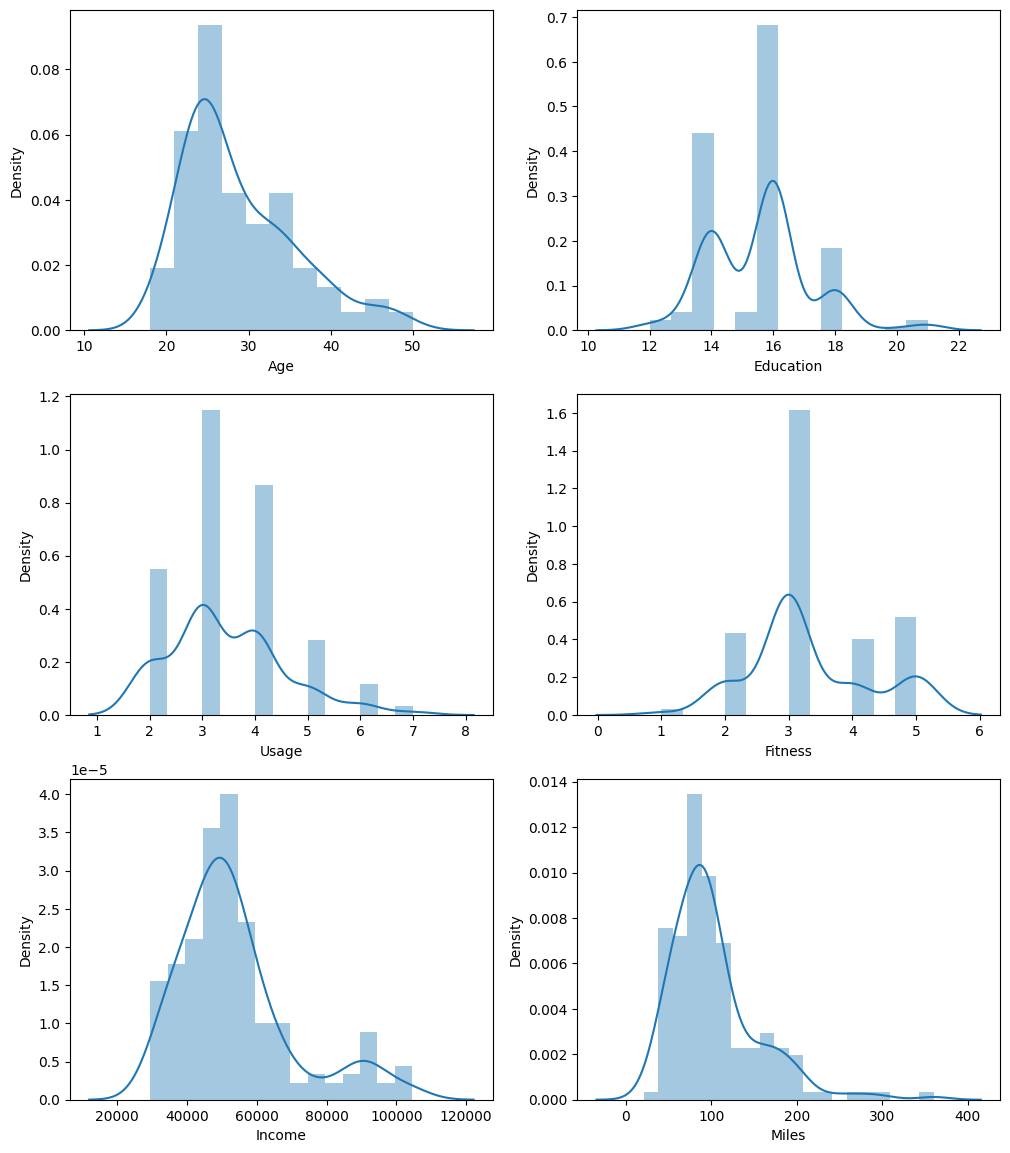

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

# Plot the distribution of different columns
sns.distplot(treadmill_data['Age'], kde=True, ax=axis[0, 0])
sns.distplot(treadmill_data['Education'], kde=True, ax=axis[0, 1])
sns.distplot(treadmill_data['Usage'], kde=True, ax=axis[1, 0])
sns.distplot(treadmill_data['Fitness'], kde=True, ax=axis[1, 1])
sns.distplot(treadmill_data['Income'], kde=True, ax=axis[2, 0])
sns.distplot(treadmill_data['Miles'], kde=True, ax=axis[2, 1])

# Show the plots
plt.show()


Summary:
1. Miles and Income exhibit significant outliers in their distribution.
2. Both Miles and Income follow a "right-skewed distribution," indicating that most of the data concentrates on the left side of the distribution.
3. Customers with fitness level 3 make the majority of treadmill purchases.
4. The majority of customers fall within the income range of $45,000 to $60,000.

**Description:**
This code uses Matplotlib and Seaborn to create a grid of subplots, where each subplot represents the count of different values in selected columns ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') from the DataFrame `treadmill_data`. The visualization is presented as count plots.

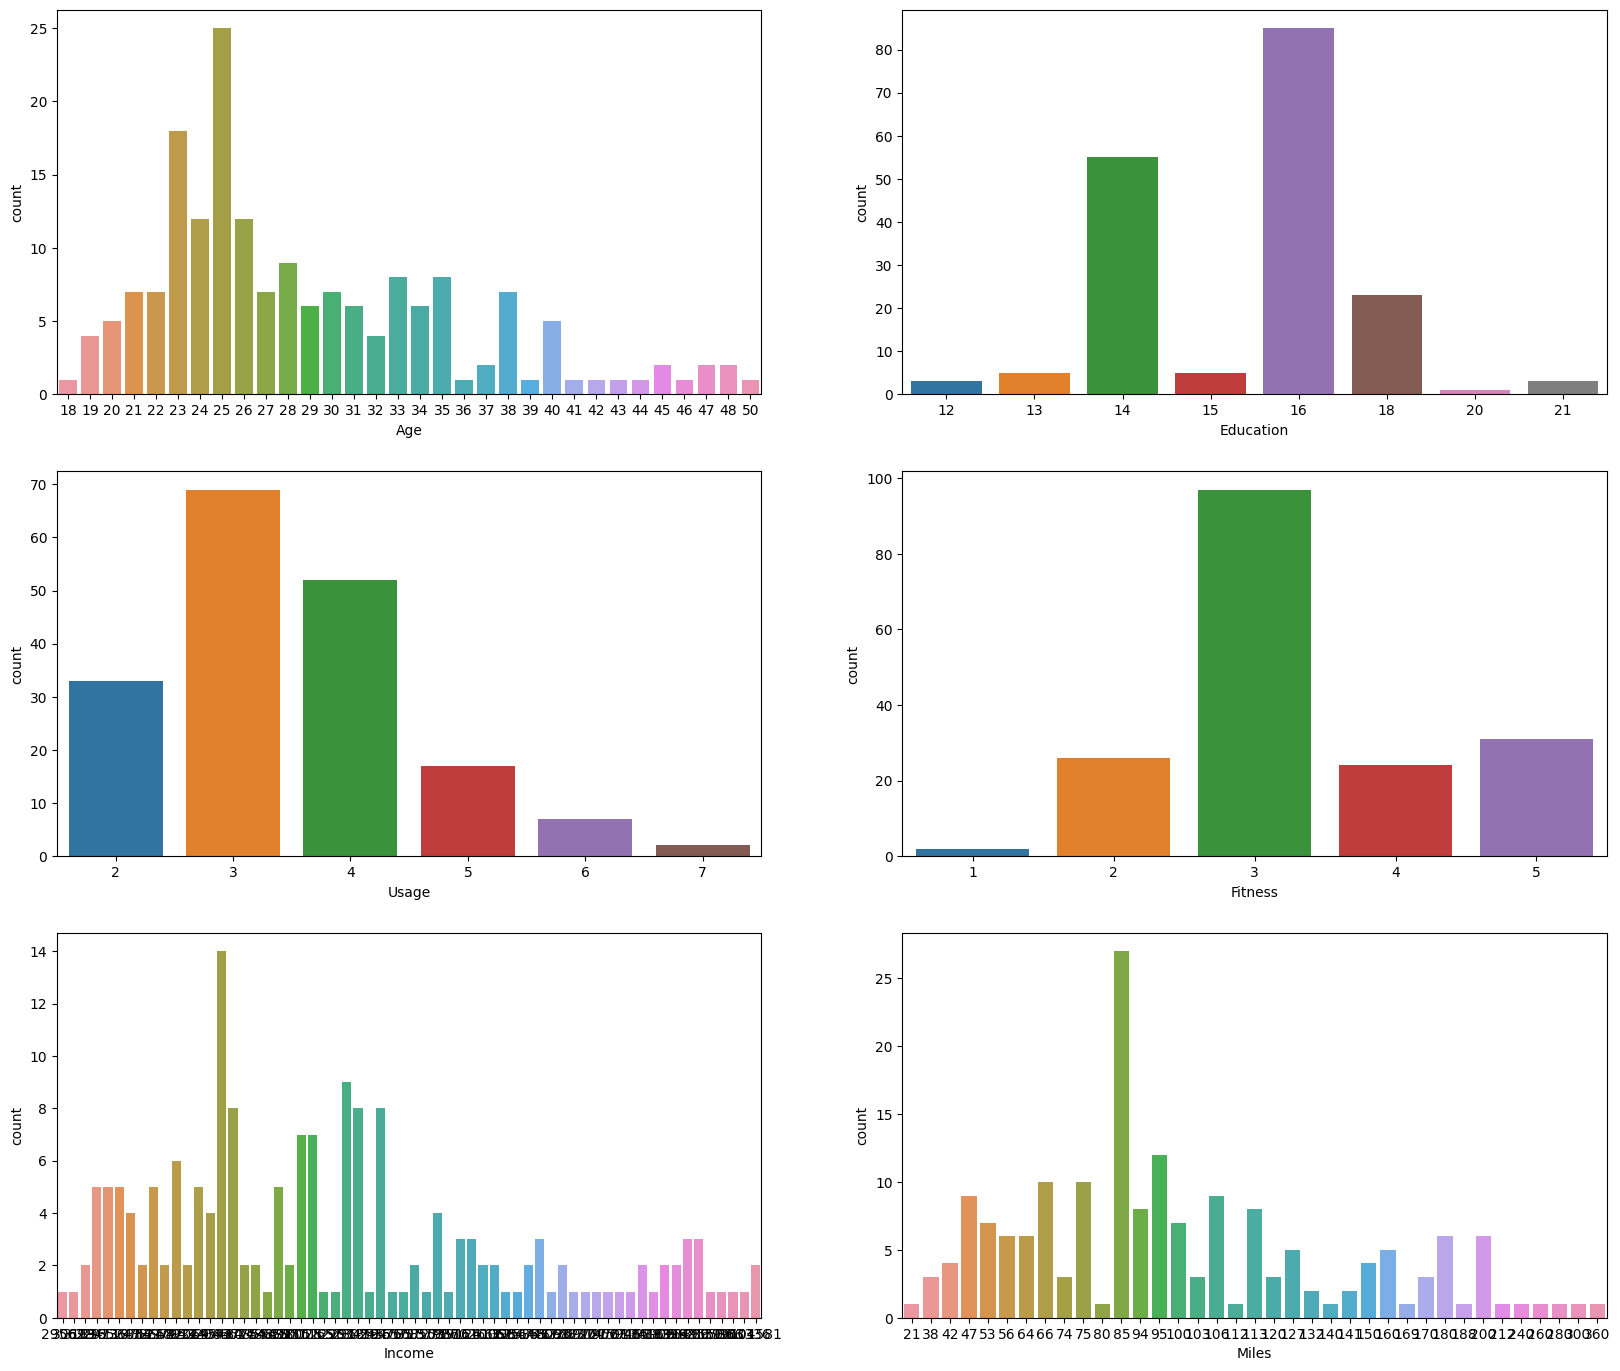

In [28]:
# Create a grid of subplots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))
fig.subplots_adjust(top=1.2)

# Plot the count of different columns
sns.countplot(data=treadmill_data, x="Age", ax=axis[0, 0])
sns.countplot(data=treadmill_data, x="Education", ax=axis[0, 1])
sns.countplot(data=treadmill_data, x="Usage", ax=axis[1, 0])
sns.countplot(data=treadmill_data, x="Fitness", ax=axis[1, 1])
sns.countplot(data=treadmill_data, x="Income", ax=axis[2, 0])
sns.countplot(data=treadmill_data, x="Miles", ax=axis[2, 1])

# Show the plots
plt.show()


Summary:

Young individuals around the age of 25 seem to be more health-conscious and are using treadmills more frequently than older individuals.

**Description:**
This code generates a grid of subplots using Matplotlib and Seaborn, where each subplot displays a boxplot for different columns ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') from the DataFrame `treadmill_data`. Boxplots provide a visual summary of the distribution, including median, quartiles, and potential outliers.

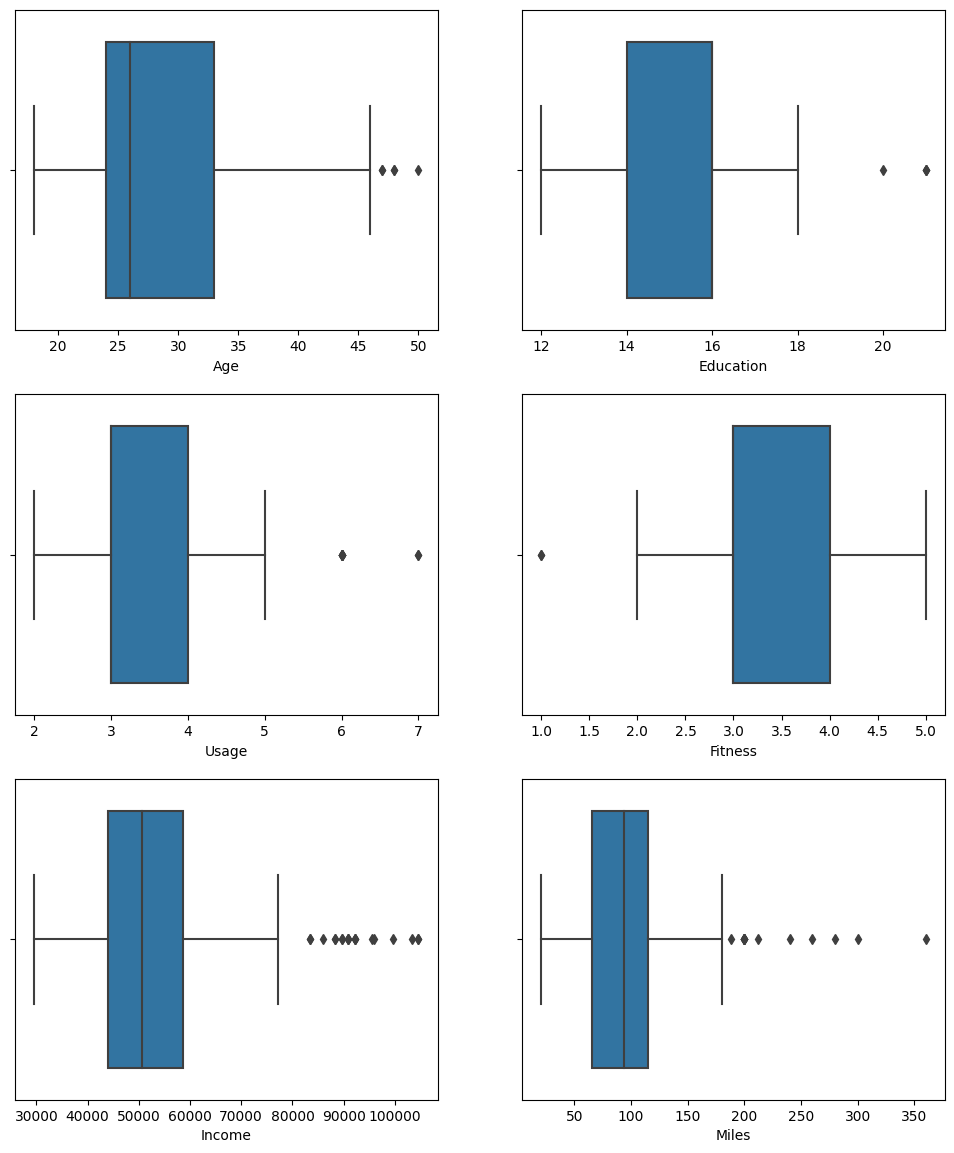

In [29]:
# Create a grid of subplots
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

# Plot boxplots for different columns
sns.boxplot(data=treadmill_data, x="Age", ax=axis[0, 0])
sns.boxplot(data=treadmill_data, x="Education", ax=axis[0, 1])
sns.boxplot(data=treadmill_data, x="Usage", ax=axis[1, 0])
sns.boxplot(data=treadmill_data, x="Fitness", ax=axis[1, 1])
sns.boxplot(data=treadmill_data, x="Income", ax=axis[2, 0])
sns.boxplot(data=treadmill_data, x="Miles", ax=axis[2, 1])

# Show the plots
plt.show()


Summary:
1. Age, Education, and Usage variables exhibit very few outliers.
2. Income and Miles, on the other hand, have a higher number of outliers.

### Univariate Analysis For Categorical Variables

**Description:**
This code creates a row of three subplots using Matplotlib and Seaborn, each displaying count plots for different categorical columns ('Product', 'Gender', and 'MaritalStatus') from the DataFrame `treadmill_data`. The count plots provide a visual representation of the distribution of each category within the respective columns.

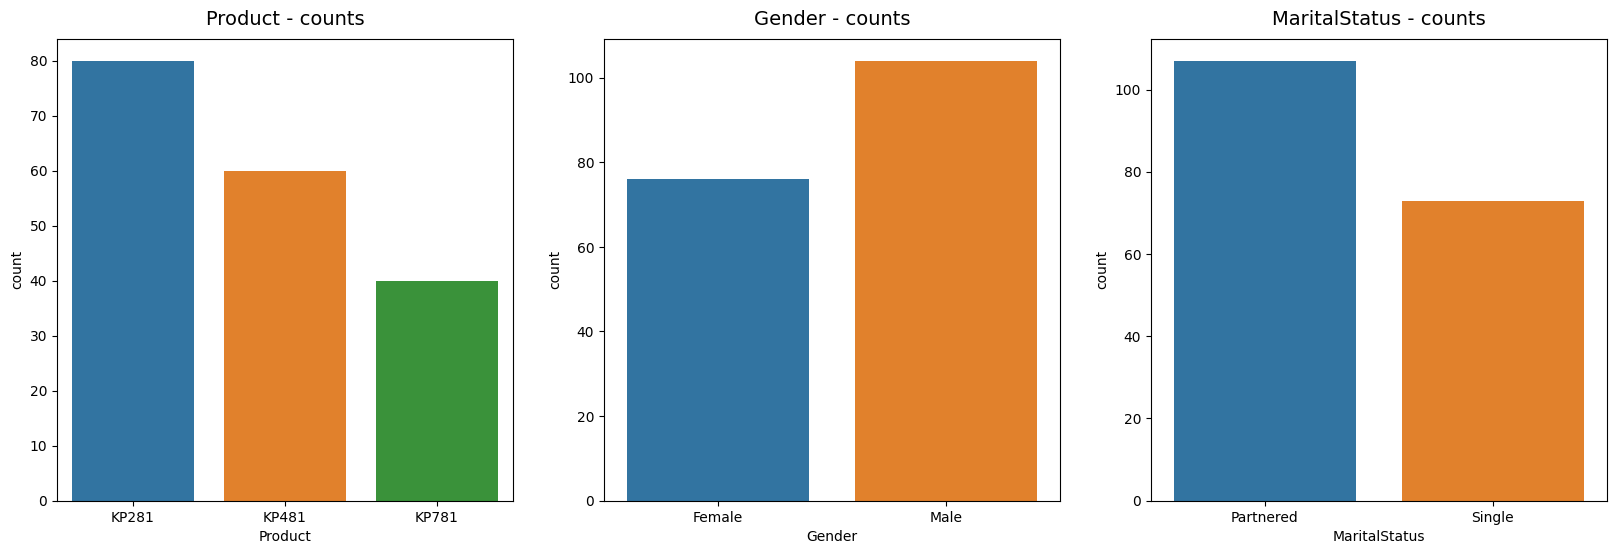

In [30]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot count plots for different categorical columns
sns.countplot(data=treadmill_data, x='Product', ax=axs[0])
sns.countplot(data=treadmill_data, x='Gender', ax=axs[1])
sns.countplot(data=treadmill_data, x='MaritalStatus', ax=axs[2])

# Set titles for each subplot
axs[0].set_title("Product - counts", pad=10, fontsize=14)
axs[1].set_title("Gender - counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - counts", pad=10, fontsize=14)

# Show the plots
plt.show()


Summary:
1. KP281 is the most frequent and best-selling product.
2. More males use treadmills than females, based on the gender distribution.
3. Treadmills are more likely to be purchased by individuals in a partnership.

### Bivariate Analysis

**Description:**
This code generates a row of three subplots using Matplotlib and Seaborn. The first two subplots are count plots comparing 'Product' with 'Gender' and 'Product' with 'MaritalStatus'. The third subplot is a count plot of 'Age' with 'Product', utilizing different hues for better visualization. The visualizations provide insights into the relationships between these categorical variables in the `treadmill_data` dataset.

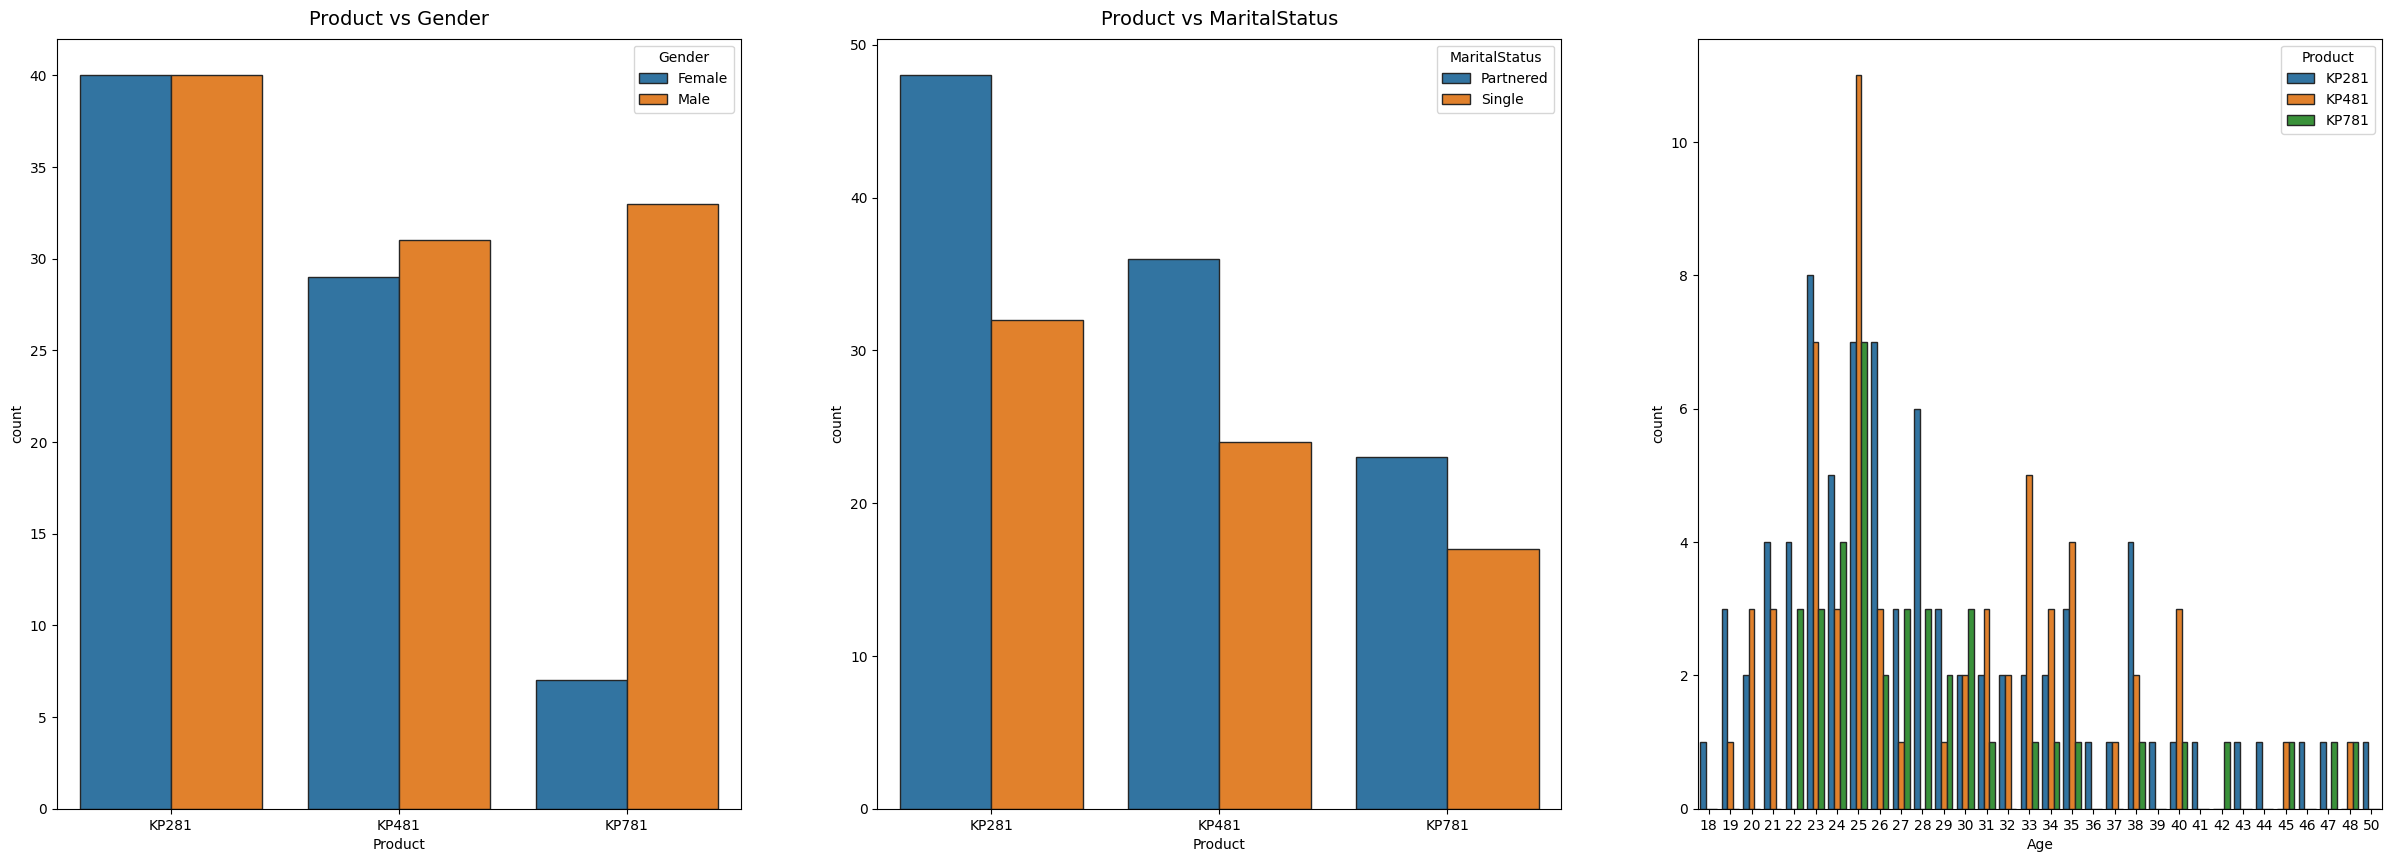

In [31]:
# Create a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

# Plot count plots with hue for different categorical columns
sns.countplot(data=treadmill_data, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0])
sns.countplot(data=treadmill_data, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[1])
sns.countplot(data=treadmill_data, x='Age', hue='Product', edgecolor="0.15", ax=axs[2])

# Set titles for each subplot
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)

# Show the plots
plt.show()


Summary:
1. For KP281 and KP481 products, an equal number of males and females have made purchases. The distribution is almost the same for both genders.
2. Most male customers have purchased the KP781 product.
3. Partnered customers are more likely to make a purchase.
4. Customers aged 25 are more likely to purchase the KP481 product.

**Description:**
This code creates a grid of subplots using Seaborn and Matplotlib, where each subplot displays a boxplot comparing different product categories with numerical attributes ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') from the DataFrame `treadmill_data`. The boxplots provide a visual comparison of the distributions of these attributes across different product types.

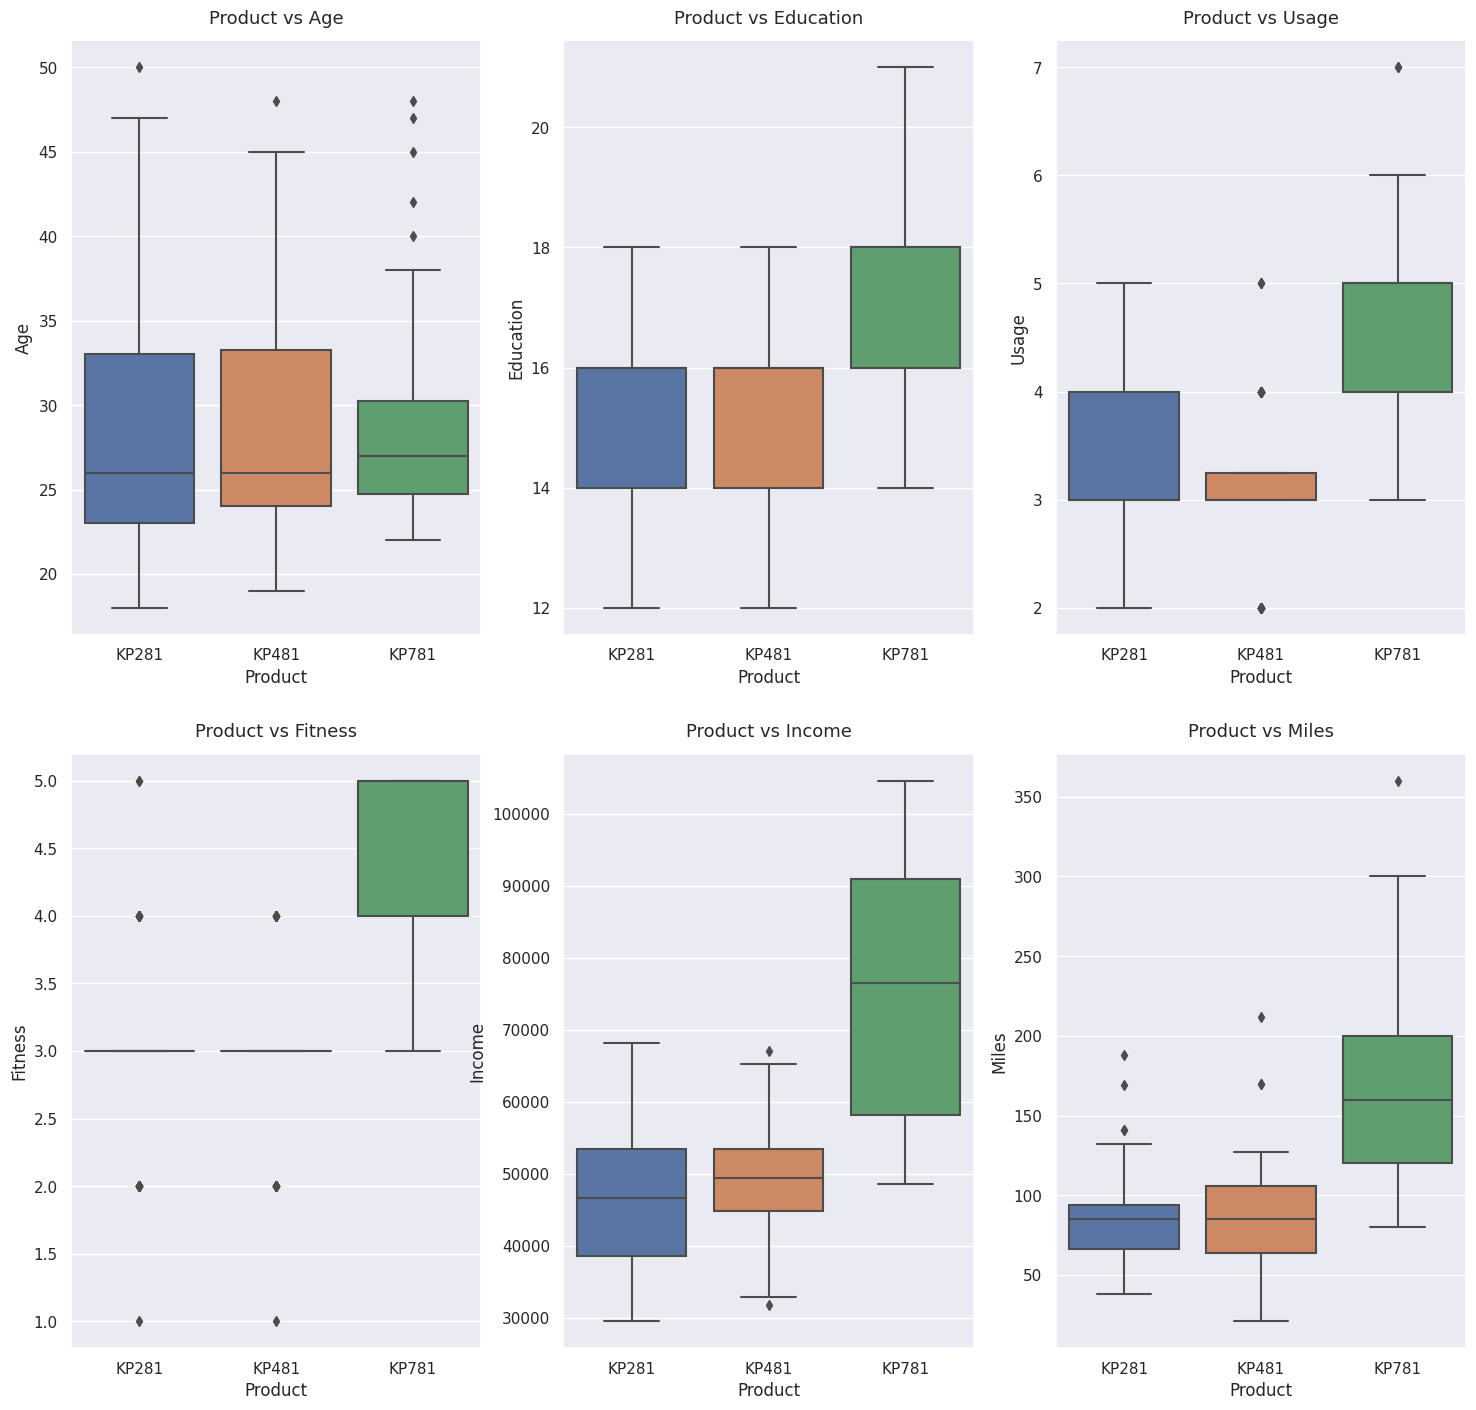

In [32]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)

count = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(data=treadmill_data, x='Product', y=attributes[count], ax=axs[i, j])
        axs[i, j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

# Show the plots
plt.show()


Summary:
1. Customers purchasing products KP281 and KP481 have the same median age value.
2. Customers aged between 25-30 are more likely to buy the KP781 product.
3. Customers with education greater than 16 are more inclined to purchase the KP781 product, while those with education less than 16 have equal chances of purchasing KP281 or KP481.
4. Customers planning to use the treadmill more than 4 times a week are more likely to buy the KP781 product, while others are likely to purchase KP281 or KP481.
5. The fitter the customer (fitness level >= 3), the higher the chances of purchasing the KP781 product.
6. Higher-income customers (Income >= 60,000) are more likely to purchase the KP781 product.
7. Customers expecting to walk/run more than 120 miles per week are more likely to buy the KP781 product.

**Description:**
This code generates a grid of subplots using Seaborn and Matplotlib. Each subplot displays a boxplot comparing the relationship between 'Gender' and numerical attributes ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') with hue distinguished by different product categories. The visualizations offer insights into how these attributes vary across gender and product types in the `treadmill_data` dataset.

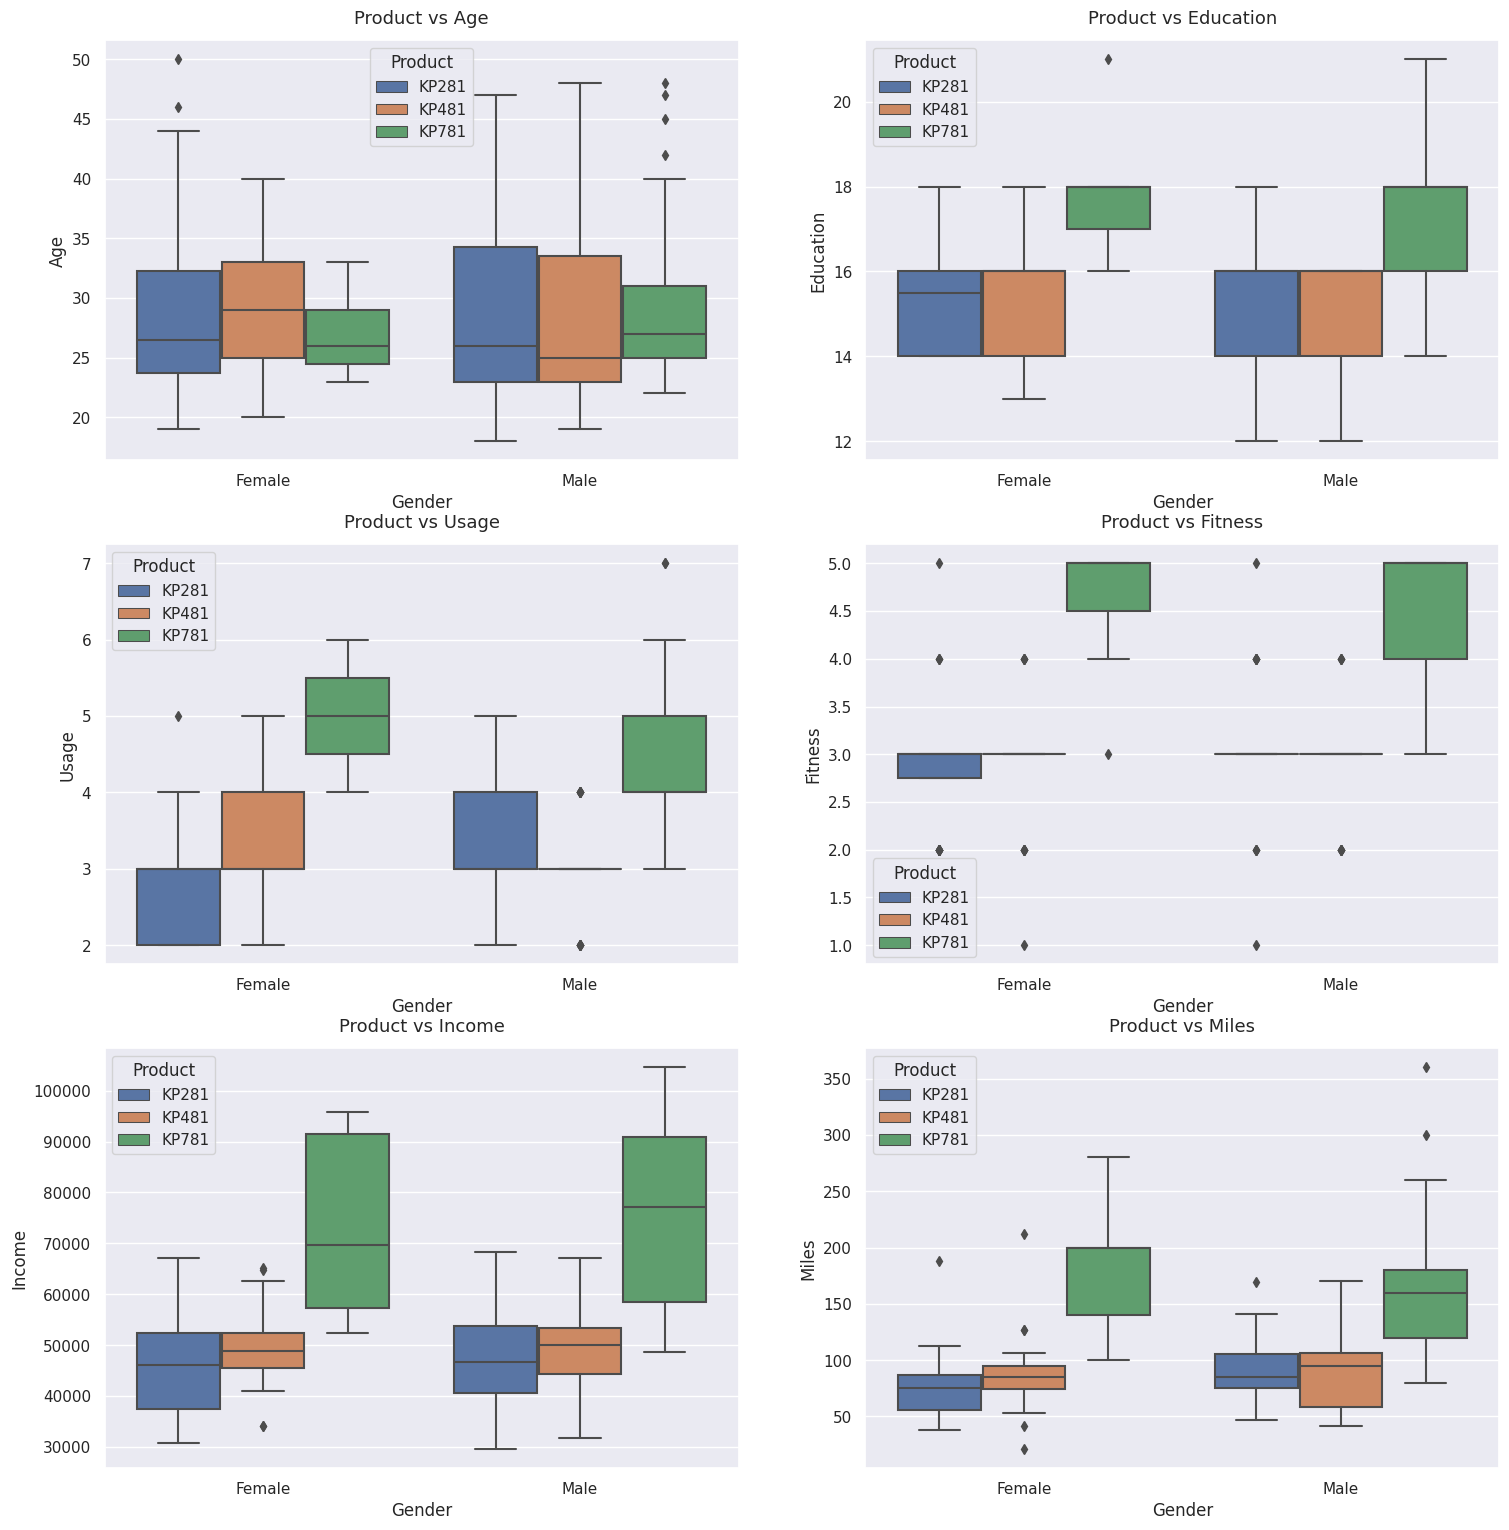

In [33]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set(color_codes=True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
fig.subplots_adjust(top=1.3)

count = 0

for i in range(3):
    for j in range(2):
        sns.boxplot(data=treadmill_data, x='Gender', y=attributes[count], hue='Product', ax=axs[i, j])
        axs[i, j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
        count += 1

# Show the plots
plt.show()


Summary:

Females who plan to use the treadmill 3-4 times a week are more likely to purchase the KP481 product.

# Correlation

**Description:**
This code calculates the covariance matrix for numerical columns in the DataFrame `treadmill_data`. The covariance matrix provides information about the joint variability between pairs of variables. The resulting matrix is not displayed here but can be used for further analysis of relationships between numerical features.

In [36]:
# Calculate the covariance matrix for numerical columns in the DataFrame
covariance_matrix = treadmill_data.cov()
# Display the covariance matrix
print("Covariance Matrix:\n")
covariance_matrix


Covariance Matrix:



/tmp/ipykernel_14442/712355322.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = treadmill_data.cov()


,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


**Description:**
This code generates a heatmap using Seaborn and Matplotlib, displaying the correlation matrix for numerical columns in the DataFrame `treadmill_data`. The heatmap provides a visual representation of the pairwise correlations between different numerical features. The values annotated in the heatmap indicate the strength and direction of the correlations, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).

/tmp/ipykernel_14442/134769283.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(treadmill_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt='0.2f')


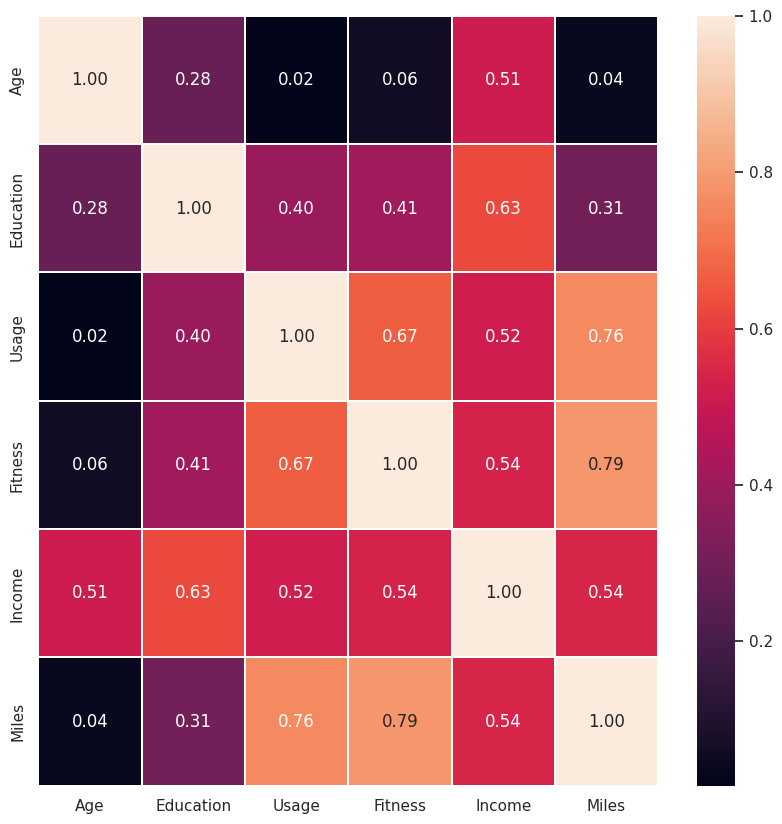

In [37]:
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(color_codes=True)
sns.heatmap(treadmill_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt='0.2f')
plt.show()

Summary:
1. There is a high correlation between (Miles & Fitness) and (Miles & Usage) attributes, suggesting that customers with higher fitness levels tend to use treadmills more.
2. Income and Education show a strong correlation. Individuals with high income and education levels prefer the KP781 treadmill, which has advanced features.
3. There is no correlation between (Usage & Age) or (Fitness & Age) attributes, indicating that age should not be a barrier to using treadmills or a specific model of treadmills.

## Pair Plots

**Description:**
This code uses Seaborn to create a pair plot for numerical columns in the DataFrame `treadmill_data`. The pair plot visualizes pairwise relationships between different numerical features, with the points colored based on the "Product" column. It provides a quick overview of how variables relate to each other and how they differ across product categories.

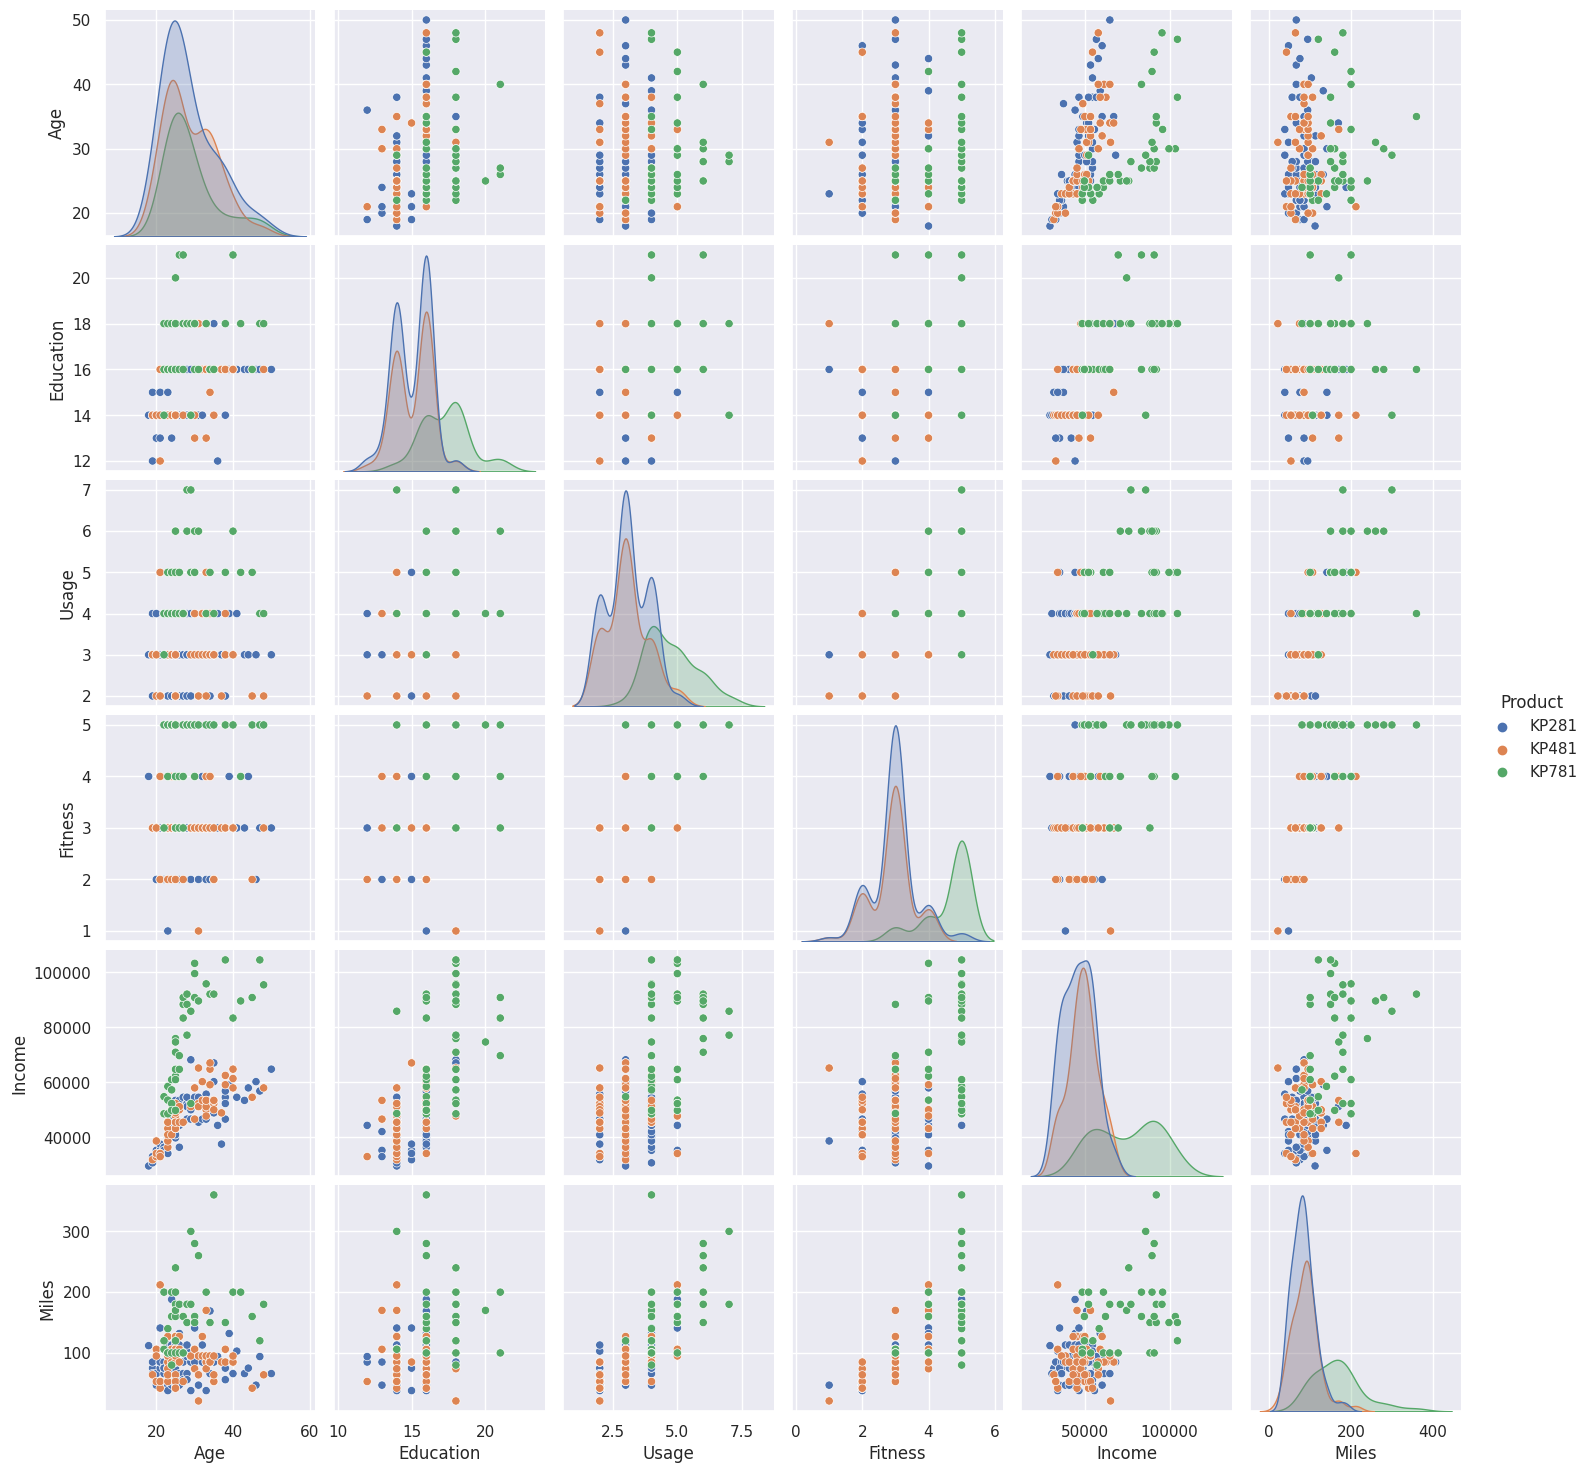

In [38]:
# Create a pair plot with hue for the "Product" column
sns.pairplot(treadmill_data, hue="Product")
plt.show()


# Marginal And Conditional Probabilities

**Description:**
This code melts the specified columns ('Product', 'Gender', 'MaritalStatus') of the DataFrame `treadmill_data` and then calculates the percentage distribution of each unique value within these columns. The result is a DataFrame showing the percentage distribution of values for each variable in the melted form.

In [39]:
# Melt the DataFrame
treadmill_data1 = treadmill_data[['Product', 'Gender', 'MaritalStatus']].melt()

# Calculate the percentage distribution
percentage_distribution = (treadmill_data1.groupby(['variable', 'value'])[['value']].count() / len(treadmill_data)).mul(100).round(3)

# Display the result
print(percentage_distribution)


                          value
variable      value            
Gender        Female     42.222
              Male       57.778
MaritalStatus Partnered  59.444
              Single     40.556
Product       KP281      44.444
              KP481      33.333
              KP781      22.222


Summary:
1. KP281 product accounts for 44.44% of customer purchases.
2. KP481 product is purchased by 33.33% of customers.
3. KP781 product is chosen by 22.22% of customers.
4. 57.78% of customers are male.
5. 59.44% of customers are partnered.

What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain
treadmill Product ?

**Description:**
This code defines a function `p_prod_given_mstatus` that calculates conditional probabilities for each product category given a specified marital status ('Single' or 'Partnered') using a contingency table. The function also optionally prints the marginal probabilities of marital status. The results show the conditional probabilities for each product category given the marital status and, if requested, the marginal probabilities of marital status. The function is then called for both 'Single' and 'Partnered' marital statuses.

In [40]:
def p_prod_given_mstatus(status, print_marginal=False):
    if status not in ["Single", "Partnered"]:
        return "Invalid marital status value."

    # Replace aerofit_df with treadmill_data
    treadmill_data1 = pd.crosstab(index=treadmill_data['MaritalStatus'], columns=[treadmill_data['Product']])
    
    p_281 = treadmill_data1['KP281'][status] / treadmill_data1.loc[status].sum()
    p_481 = treadmill_data1['KP481'][status] / treadmill_data1.loc[status].sum()
    p_781 = treadmill_data1['KP781'][status] / treadmill_data1.loc[status].sum()

    if print_marginal:
        print(f"P(Single): {treadmill_data1.loc['Single'].sum() / len(treadmill_data):.2f}")
        print(f"P(Partnered): {treadmill_data1.loc['Partnered'].sum() / len(treadmill_data):.2f}\n")

    print(f"P(KP281/{status}): {p_281:.2f}")
    print(f"P(KP481/{status}): {p_481:.2f}")
    print(f"P(KP781/{status}): {p_781:.2f}\n")

# Call the function
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')


P(Single): 0.41
P(Partnered): 0.59

P(KP281/Single): 0.44
P(KP481/Single): 0.33
P(KP781/Single): 0.23

P(KP281/Partnered): 0.45
P(KP481/Partnered): 0.34
P(KP781/Partnered): 0.21



**Description:**
This code creates a contingency table (`product_gender`) using the `pd.crosstab` function to display the count of occurrences for each combination of 'Product' and 'Gender' in the DataFrame `treadmill_data`. The `margins=True` parameter adds a row and column showing the totals. This table provides a clear overview of the distribution of products across different gender categories.

In [42]:
# Replace aerofit_df with treadmill_data
product_gender = pd.crosstab(index=treadmill_data['Product'], columns=[treadmill_data['Gender']], margins=True)

# Display the contingency table
(product_gender)


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**Description:**
This code calculates and prints the percentage of male customers purchasing a treadmill based on the 'Gender' column in the DataFrame `treadmill_data`. The percentage is calculated as the proportion of male customers in the dataset who made a purchase.

In [43]:
# Replace aerofit_df with treadmill_data
prob_male_purchase = treadmill_data['Gender'].value_counts(normalize=True)['Male']

# Display the percentage
pct = round(prob_male_purchase * 100, 2)
print(f"The percentage of male customers purchasing a treadmill is: {pct}%")


The percentage of male customers purchasing a treadmill is: 57.78%


**Description:**
This code calculates and prints the percentage of female customers purchasing the KP781 treadmill based on the 'Gender' and 'Product' columns in the DataFrame `treadmill_data`. The percentage is calculated as the proportion of female customers in the dataset who purchased the specific product.

In [44]:
# Replace aerofit_df with treadmill_data
prob_female_purchase_kp781 = treadmill_data.loc[treadmill_data['Gender'] == 'Female', 'Product'].value_counts(normalize=True)['KP781']

# Display the percentage
pct = round(prob_female_purchase_kp781 * 100, 2)
print(f"The percentage of female customers purchasing the KP781 treadmill is: {pct}%")


The percentage of female customers purchasing the KP781 treadmill is: 9.21%


**Description:**
This code calculates and prints the probability of a customer being female given that the purchased product is KP281. It uses the 'Gender' and 'Product' columns in the DataFrame `treadmill_data`. The probability is calculated as the proportion of customers who purchased KP281 and are female.

In [45]:
# Replace aerofit_df with treadmill_data
prob_female_given_kp281 = treadmill_data.loc[treadmill_data['Product'] == 'KP281', 'Gender'].value_counts(normalize=True)['Female']

# Display the probability
pct = round(prob_female_given_kp281 * 100, 2)
print(f"The probability of a customer being female given that the product is KP281 is: {pct}%")


The probability of a customer being female given that the product is KP281 is: 50.0%


Summary:
1. Female customers show a preference for purchasing both KP281 and KP481 treadmill models.
2. Specifically, 50% of female customers tend to choose the KP281 treadmill model.

### Product - Age

**Description:**
This code creates two new columns, 'AgeGroup' and 'AgeCategory', in the DataFrame `treadmill_data` based on the 'Age' column. It uses the `pd.cut` function to categorize ages into bins defined by the specified ranges. The resulting 'AgeGroup' column represents the age group intervals, and the 'AgeCategory' column represents age categories with corresponding labels.

In [47]:
# Replace aerofit_df2 with treadmill_data
bins = [14, 20, 30, 40, 60]
labels = ["Teens", "20s", "30s", "Above 40s"]

treadmill_data['AgeGroup'] = pd.cut(treadmill_data['Age'], bins)
treadmill_data['AgeCategory'] = pd.cut(treadmill_data['Age'], bins, labels=labels)
treadmill_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
94,KP481,24,Female,14,Single,3,2,40932,85,"(20, 30]",20s
144,KP781,23,Female,18,Single,5,4,53536,100,"(20, 30]",20s
167,KP781,30,Female,16,Partnered,6,5,90886,280,"(20, 30]",20s
82,KP481,20,Female,14,Partnered,3,3,34110,106,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens


**Description:**
This code creates a contingency table (`product_age`) using the `pd.crosstab` function to display the count of occurrences for each combination of 'Product' and 'AgeCategory' in the DataFrame `treadmill_data`. The table provides a summary of the distribution of products across different age categories.

In [48]:
# Replace aerofit_df2 with treadmill_data
product_age = pd.crosstab(index=treadmill_data['Product'], columns=[treadmill_data['AgeCategory']], margins=True)

# Display the contingency table
(product_age)


AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


**Description:**
This code calculates and prints the percentage of customers with ages between 20s and 30s among all customers in the DataFrame `treadmill_data`. It uses the contingency table `product_age` and calculates the proportion of customers falling into the specified age range.

In [49]:
# Replace aerofit_df2 with treadmill_data
prob_age_20s_30s = product_age['20s']['All'] / product_age['All']['All']

# Display the percentage
pct = round(prob_age_20s_30s * 100, 2)
print(f"The percentage of customers with age between 20s and 30s among all customers is: {pct}%")


The percentage of customers with age between 20s and 30s among all customers is: 61.11%


Summary:
1. Teens do not prefer to buy the KP781 treadmill model.
2. A majority, 61%, of customers fall between the ages of 20 and 30.

### Product - Income

**Description:**
This code creates a new column, 'IncomeCategory', in the DataFrame `treadmill_data` based on the 'Income' column. It uses the `pd.cut` function to categorize income values into bins defined by the specified ranges. The resulting 'IncomeCategory' column represents income categories with corresponding labels.

In [51]:
# Replace aerofit_df3 with treadmill_data
bins_income = [29000, 35000, 60000, 85000, 105000]
labels_income = ['Low Income', 'Lower-middle Income', 'Upper-Middle Income', 'High Income']

treadmill_data['IncomeCategory'] = pd.cut(treadmill_data['Income'], bins_income, labels=labels_income)
treadmill_data.sample(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeCategory
33,KP281,25,Male,16,Single,3,3,43206,85,"(20, 30]",20s,Lower-middle Income
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s,High Income
151,KP781,25,Male,16,Partnered,4,4,62251,160,"(20, 30]",20s,Upper-Middle Income
163,KP781,28,Male,18,Partnered,7,5,77191,180,"(20, 30]",20s,Upper-Middle Income
95,KP481,24,Male,14,Single,3,4,48891,106,"(20, 30]",20s,Lower-middle Income


**Description:**
This code creates a contingency table (`product_income`) using the `pd.crosstab` function to display the count of occurrences for each combination of 'Product' and 'IncomeCategory' in the DataFrame `treadmill_data`. The table provides a summary of the distribution of products across different income categories.

In [52]:
# Replace aerofit_df3 with treadmill_data
product_income = pd.crosstab(index=treadmill_data['Product'], columns=[treadmill_data['IncomeCategory']])

# Display the contingency table
(product_income)


IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income
Product,,,,
KP281,8,66,6,0
KP481,6,47,7,0
KP781,0,11,12,17


**Description:**
This code calculates and prints the percentage of low-income customers purchasing a treadmill based on the contingency table `product_income`. It computes the proportion of purchases made by low-income customers for each product category. The resulting percentages provide insights into the purchasing behavior of customers in the low-income category for each product.

In [56]:
# Replace aerofit_df3 with treadmill_data
prob_low_income_purchase = product_income['Low Income'] / product_income.sum(axis=1)

# Display the percentage
pct = round(prob_low_income_purchase * 100, 2)
print(f"The percentage of low-income customers purchasing a treadmill is: {pct}%")


The percentage of low-income customers purchasing a treadmill is: Product
KP281    10.0
KP481    10.0
KP781     0.0
dtype: float64%


### Product - Fitness

**Description:**
This code creates a contingency table (`product_fitness`) using the `pd.crosstab` function to display the count of occurrences for each combination of 'Product' and 'Fitness' in the DataFrame `treadmill_data`. The table provides a summary of the distribution of products across different fitness levels. The `margins=True` parameter adds a row and column showing the totals.

In [58]:
# Replace aerofit_df with treadmill_data
product_fitness = pd.crosstab(index=treadmill_data['Product'], columns=[treadmill_data['Fitness']], margins=True)

# Display the contingency table
(product_fitness)


Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


**Description:**
This code calculates and prints the percentage of customers having fitness level 5 based on the contingency table `product_fitness`. It computes the proportion of customers with fitness level 5 among all customers. The resulting percentage provides insights into the distribution of the highest fitness level among the customers in the dataset.


In [59]:
# Replace aerofit_df with treadmill_data
prob_fitness_level_5 = product_fitness[5]['All'] / product_fitness['All']['All']

# Display the percentage
pct = round(prob_fitness_level_5 * 100, 2)
print(f"The percentage of customers having fitness level 5 is: {pct}%")


The percentage of customers having fitness level 5 is: 17.22%


**Description:**
This code calculates and prints the percentage of customers with fitness level 5 purchasing the KP781 treadmill based on the contingency table `product_fitness`. It computes the proportion of customers with fitness level 5 among those who purchased the KP781 treadmill. The resulting percentage provides insights into the purchasing behavior of customers with the highest fitness level for a specific product.

In [61]:
# Replace aerofit_df with treadmill_data
prob_fitness_level_5_kp781 = product_fitness[5]['KP781'] / product_fitness['All']['All']

# Display the percentage
pct = round(prob_fitness_level_5_kp781 * 100, 2)
print(f"The percentage of customers with fitness level 5 purchasing the KP781 treadmill is: {pct}%")


The percentage of customers with fitness level 5 purchasing the KP781 treadmill is: 16.11%


**Description:**
This code calculates and prints the percentage of customers with fitness level 5 buying the KP781 treadmill given that the product is KP781. It uses the contingency table `product_fitness` to compute the proportion of customers with fitness level 5 among those who purchased the KP781 treadmill. The resulting percentage provides insights into the likelihood of having a high fitness level among customers who chose the KP781 product.

In [62]:
# Replace aerofit_df with treadmill_data
prob_fitness_level_5_given_kp781 = product_fitness[5]['KP781'] / product_fitness['All']['KP781']

# Display the percentage
pct = round(prob_fitness_level_5_given_kp781 * 100, 2)
print(f"The percentage of customers with fitness level 5 buying the KP781 treadmill given that the product is KP781 is: {pct}%")


The percentage of customers with fitness level 5 buying the KP781 treadmill given that the product is KP781 is: 72.5%


### Product - Marital Status

**Description:**
This code creates a contingency table (`product_marital`) using the `pd.crosstab` function to display the count of occurrences for each combination of 'Product' and 'MaritalStatus' in the DataFrame `treadmill_data`. The table provides a summary of the distribution of products across different marital status categories. The `margins=True` parameter adds a row and column showing the totals.

In [64]:
# Replace aerofit_df with treadmill_data
product_marital = pd.crosstab(index=treadmill_data['Product'], columns=[treadmill_data['MaritalStatus']], margins=True)

# Display the contingency table
(product_marital)


MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


**Description:**
This code calculates and prints the percentage of customers who are partnered and using treadmills based on the contingency table `product_marital`. It computes the proportion of partnered customers among all customers who purchased treadmills. The resulting percentage provides insights into the distribution of treadmill usage among partnered customers.

In [65]:
# Replace aerofit_df with treadmill_data
prob_partnered_treadmills = product_marital['Partnered']['All'] / product_marital['All']['All']

# Display the percentage
pct = round(prob_partnered_treadmills * 100, 2)
print(f"The percentage of customers who are partnered using treadmills is: {pct}%")


The percentage of customers who are partnered using treadmills is: 59.44%


# Outlier Detection

**Description:**
This code uses Seaborn and Matplotlib to create a grid of subplots, each displaying a boxplot for different numerical columns ('Age', 'Education', 'Usage', 'Fitness', 'Income', and 'Miles') from the DataFrame `treadmill_data`. Boxplots provide a visual summary of the distribution of each numerical feature, including median, quartiles, and potential outliers. The visualizations help in understanding the spread and central tendency of these features.

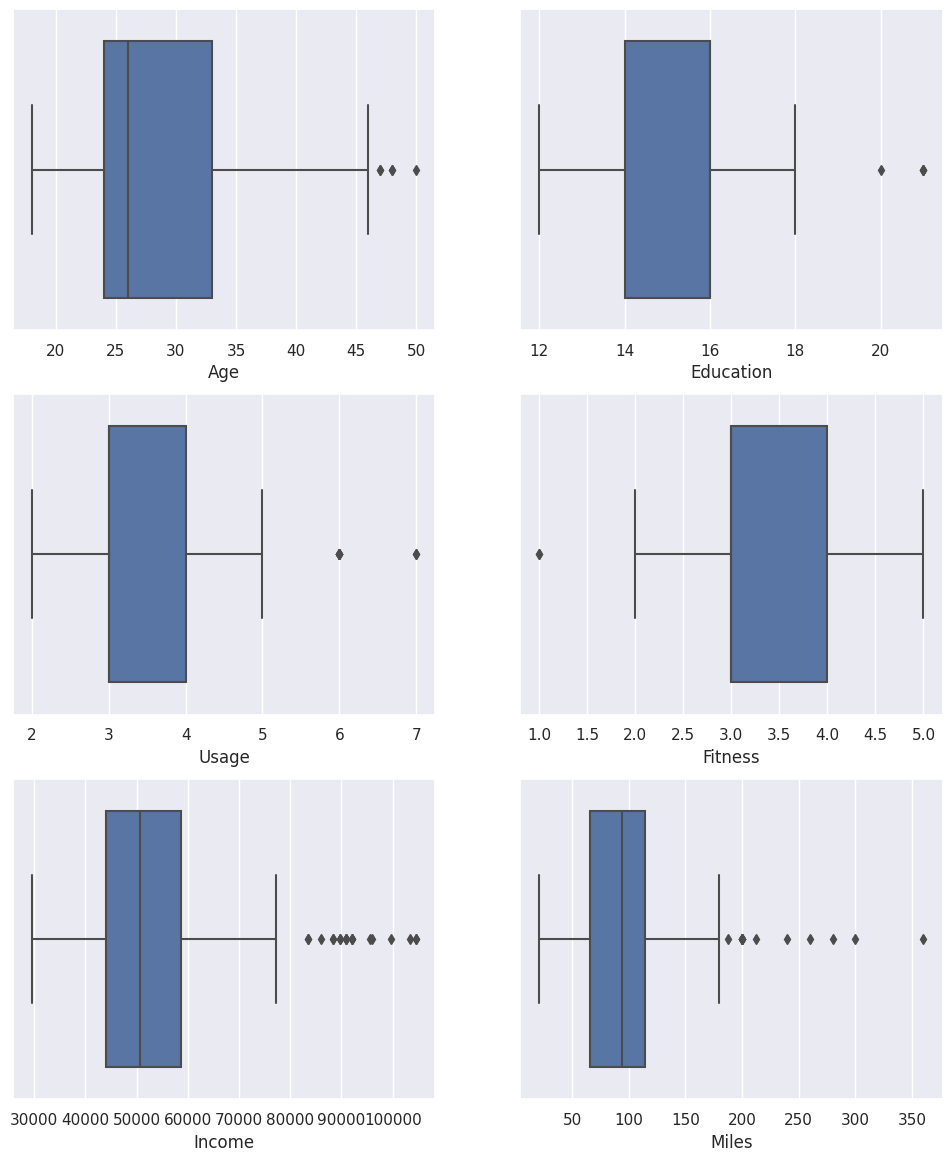

In [66]:
# Replace aerofit_df with treadmill_data
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=treadmill_data, x='Age', ax=axis[0, 0])
sns.boxplot(data=treadmill_data, x='Education', ax=axis[0, 1])
sns.boxplot(data=treadmill_data, x='Usage', ax=axis[1, 0])
sns.boxplot(data=treadmill_data, x='Fitness', ax=axis[1, 1])
sns.boxplot(data=treadmill_data, x='Income', ax=axis[2, 0])
sns.boxplot(data=treadmill_data, x='Miles', ax=axis[2, 1])

plt.show()


Summary:
1. Age, Education, and Usage have very few outliers.
2. Income and Miles show more outliers.
3. Only a small percentage of customers run more than 180 miles per week.

### Outlier Handling for Income Feature

This Python code uses Seaborn and Matplotlib to create a horizontal boxplot for the 'Income' column in the `treadmill_data` DataFrame, while filtering out outliers based on the interquartile range (IQR).

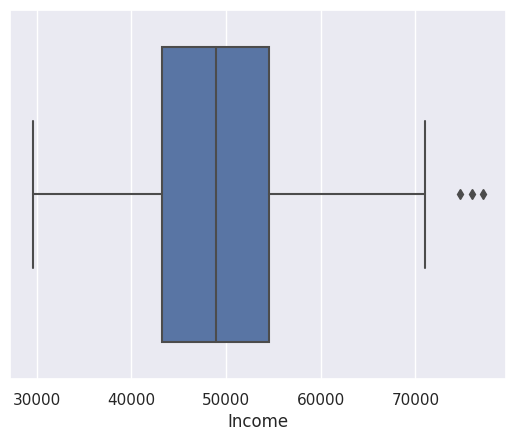

In [67]:
# Replace aerofit_df1 with treadmill_data
Q3 = treadmill_data['Income'].quantile(0.75)
Q1 = treadmill_data['Income'].quantile(0.25)
IQR = Q3 - Q1

# Filtering outliers
treadmill_data_filtered = treadmill_data[(treadmill_data['Income'] > Q1 - 1.5 * IQR) & (treadmill_data['Income'] < Q3 + 1.5 * IQR)]

# Create a horizontal boxplot
sns.boxplot(data=treadmill_data_filtered, x="Income", orient='h')
plt.show()


### Outlier Handling for Miles Feature

This Python code utilizes Seaborn and Matplotlib to generate a horizontal boxplot for the 'Miles' column in the `treadmill_data` DataFrame. Outliers are excluded by removing the top 5% and bottom 1% of values based on the interquartile range (IQR).

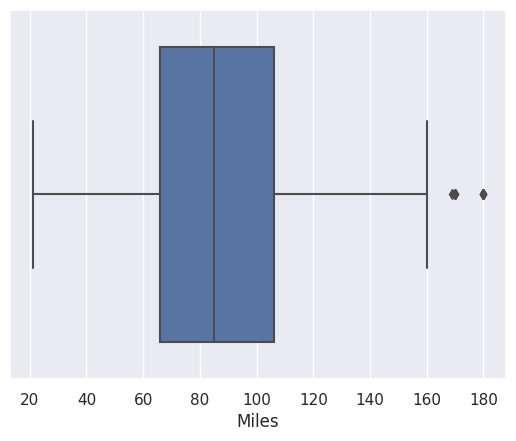

In [68]:
# Replace aerofit_df1 with treadmill_data
Q3 = treadmill_data['Miles'].quantile(0.75)
Q1 = treadmill_data['Miles'].quantile(0.25)
IQR = Q3 - Q1

# Removing top 5% and bottom 1% of values
treadmill_data_outliers_removed = treadmill_data[(treadmill_data['Miles'] > Q1 - 1.5 * IQR) & (treadmill_data['Miles'] < Q3 + 1.5 * IQR)]

# Create a horizontal boxplot
sns.boxplot(data=treadmill_data_outliers_removed, x="Miles", orient='h')
plt.show()


Summary:

Although there are outliers, they can offer valuable insights, especially for high-end models that may benefit companies. Therefore, it is advisable not to remove them for further analysis.

# Actionable Insights
1. KP281 is the best-selling product, accounting for 44.0% of all treadmill sales.
2. The majority of treadmill customers have incomes between $45,000 and $80,000.
3. 83% of treadmills are purchased by individuals with incomes between $35,000 and $85,000.
4. Only 8% of customers with incomes below $35,000 buy treadmills.
5. 88% of treadmills are bought by customers aged 20 to 40.
6. Miles, Fitness, and Usage are highly correlated, indicating that customers with higher fitness levels tend to use treadmills more.
7. KP781 is purchased by customers with over 20 years of education and incomes exceeding $85,000.
8. Customers with Fitness levels 4 and 5 tend to use high-end treadmills, with an average weekly mileage above 150.

# Recommendations
1. Market KP281 & KP481 as affordable models for customers with incomes between $45,000 and $60,000.
2. Position KP781 as a premium model, targeting high-income individuals and those with over 20 years of education for increased sales.
3. Market the KP781 to sporty individuals with high weekly mileage and higher income levels.
4. Conduct market research to explore attracting customers with incomes under $35,000 to expand the customer base.